# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)



642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Weather from above cited cities
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
APPID = weather_api_key
query_url = f"{base_url}appid={APPID}&units={units}&q="

#cities = ["Minneapolis", "Duluth", "Mankato"]

# Lists for output
lat = []
lon = []
found_cities = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(city)
        print(f"Processing record: {city}")
    except:
        print(f"City not found: {city}")
print(f"Finished")


Processing record: jamestown
Processing record: bluff
Processing record: busselton
Processing record: vaini
Processing record: rikitea
Processing record: nyurba
Processing record: port lincoln
Processing record: mahebourg
Processing record: zaraza
Processing record: esperance
Processing record: kapuskasing
Processing record: hambantota
Processing record: havoysund
Processing record: samarai
Processing record: hermanus
Processing record: butaritari
City not found: doctor pedro p. pena
Processing record: tasiilaq
Processing record: namatanai
Processing record: mogadishu
Processing record: rawson
Processing record: dwarka
Processing record: provideniya
Processing record: kapaa
Processing record: bredasdorp
Processing record: cidreira
Processing record: georgetown
Processing record: ushuaia
Processing record: borodino
Processing record: hauterive
Processing record: fortuna
Processing record: castro
Processing record: bandarbeyla
Processing record: arauco
Processing record: punta arenas
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather_df = pd.DataFrame({
    'City':found_cities, 
    'Lat':lat,
    'Lon':lon,
    'Max Temp':temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date': dt.date.today()
    })
weather_df.to_csv("../python-api-challenge/output/cities.csv", index=True, index_label='City', header=True)

weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,63.99,47,83,2.91,US,2022-08-10
1,bluff,-46.6000,168.3333,44.80,57,8,10.22,NZ,2022-08-10
2,busselton,-33.6500,115.3333,55.62,75,89,3.62,AU,2022-08-10
3,vaini,-21.2000,-175.2000,80.76,89,75,17.27,TO,2022-08-10
4,rikitea,-23.1203,-134.9692,73.24,73,100,22.44,PF,2022-08-10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
steamy = weather_df[weather_df['Humidity'] > 100]
steamy

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
weather_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,19.379263,13.919403,68.566695,72.905565,54.659359,7.676239
std,33.344379,89.344845,12.893460,18.799561,41.794971,5.570628
min,-54.800000,-175.200000,35.080000,11.000000,0.000000,0.000000
25%,-8.050000,-66.663100,59.050000,65.000000,7.000000,3.620000
50%,21.283300,16.919800,69.930000,78.000000,65.000000,6.150000
75%,47.499700,92.750000,78.460000,87.000000,100.000000,10.130000
max,78.218600,179.316700,99.460000,100.000000,100.000000,31.070000


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There were no cities over 100%

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.loc[weather_df['Humidity'] <= 100]
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,63.99,47,83,2.91,US,2022-08-10
1,bluff,-46.6000,168.3333,44.80,57,8,10.22,NZ,2022-08-10
2,busselton,-33.6500,115.3333,55.62,75,89,3.62,AU,2022-08-10
3,vaini,-21.2000,-175.2000,80.76,89,75,17.27,TO,2022-08-10
4,rikitea,-23.1203,-134.9692,73.24,73,100,22.44,PF,2022-08-10


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

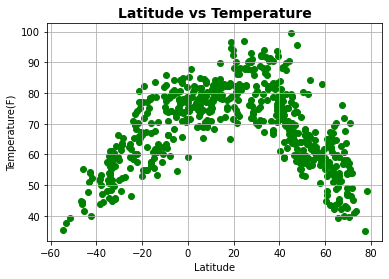

In [8]:
plt.scatter(lat, temp, marker="o", facecolors="green" )

# add labels and display as a grid
plt.title("Latitude vs Temperature", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Temperature(F)", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_temp.png")
plt.show()

### The closer you are to the equator (0), the greater the likelihood of a higher temperature.

## Latitude vs. Humidity Plot

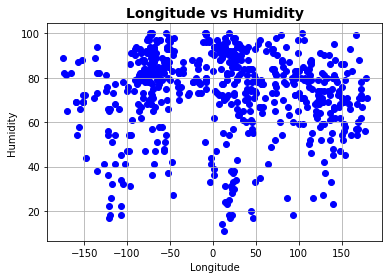

In [9]:
plt.scatter(lon, humidity, marker="o", facecolors="blue" )

# add labels and display as a grid
plt.title("Longitude vs Humidity", fontsize=14, weight='bold')
plt.xlabel("Longitude", fontsize=10)
plt.ylabel("Humidity", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lon_vs_humid.png")
plt.show()

### The humidity levels are often more concentrated away from 0

## Latitude vs. Cloudiness Plot

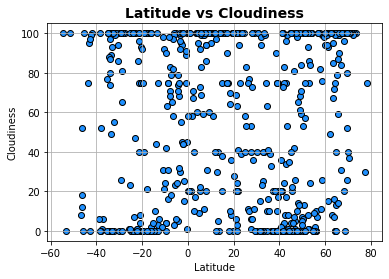

In [10]:
plt.scatter(lat, cloudiness, marker="o", facecolors="dodgerblue", edgecolor='black' )

# add labels and display as a grid
plt.title("Latitude vs Cloudiness", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_cloud.png")
plt.show()

### The sun is always shining near the equator.

## Latitude vs. Wind Speed Plot

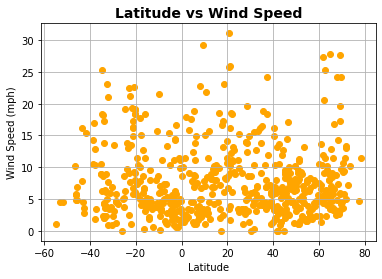

In [11]:
plt.scatter(lat, wind_speed, marker="o", facecolors="orange" )

# add labels and display as a grid
plt.title("Latitude vs Wind Speed", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_wind.png")
plt.show()

### Wind speed is concentrated between 0 mph and 10 mph. There are some fliers farther away from the equator.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47493718518836725


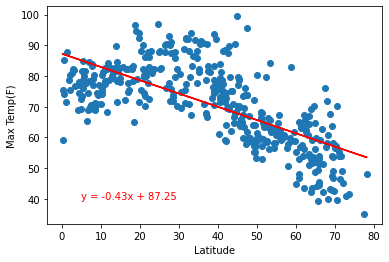

In [12]:
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >0 ]

# Call variables for comparison
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.0,40), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6444580937981323


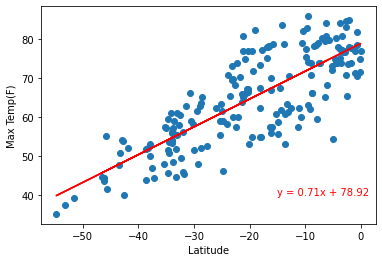

In [13]:
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] <0 ]

# Call variables for comparison
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-15.0,40), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0039033103708664254


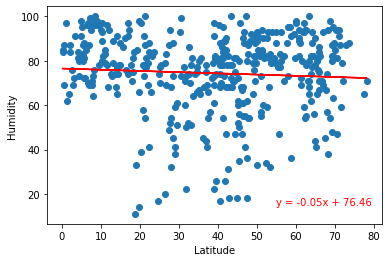

In [14]:
# Call variables for comparison
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(55.0,15), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00491416239528444


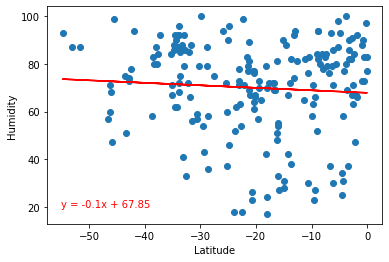

In [26]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55.0,20), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00016350280625670319


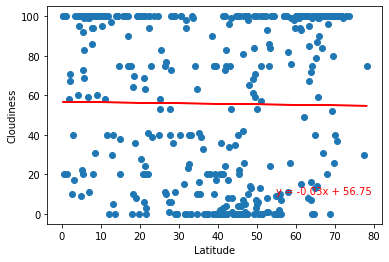

In [27]:
# Call variables for comparison
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(55.0,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0012181285373868797


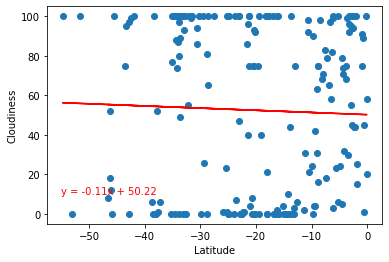

In [28]:
# Call variables for comparison
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55.0,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00039653066234992174


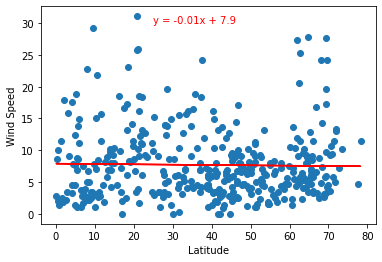

In [29]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(25.0,30), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020349292816411478


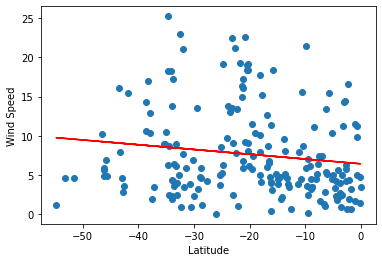

In [30]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55.0,27), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()